In [26]:
import pandas as pd
import numpy as np
import squarify 
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [3]:
df = pd.read_csv('...\Fifa_23_Players_Data.csv')
df.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


In [4]:
df.columns

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

In [5]:
columns = ['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)','Positions Played', 'Best Position', 'Nationality', 'Age', 'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats', 'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position', 'Contract Until', 'Club Jersey Number', 'Preferred Foot', 'Weak Foot Rating', 'Skill Moves', 'International Reputation', 'National Team Name', 'National Team Position', 'National Team Jersey Number']
data = df[columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17529 entries, 0 to 17528
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     17529 non-null  object
 1   Full Name                    17529 non-null  object
 2   Overall                      17529 non-null  int64 
 3   Potential                    17529 non-null  int64 
 4   Value(in Euro)               17529 non-null  int64 
 5   Positions Played             17529 non-null  object
 6   Best Position                17529 non-null  object
 7   Nationality                  17529 non-null  object
 8   Age                          17529 non-null  int64 
 9   Height(in cm)                17529 non-null  int64 
 10  Weight(in kg)                17529 non-null  int64 
 11  TotalStats                   17529 non-null  int64 
 12  BaseStats                    17529 non-null  int64 
 13  Club Name                    17

In [7]:
print(data["Contract Until"].unique())
print(data["Club Jersey Number"].unique())
print(data["National Team Jersey Number"].unique())

['2023' '2025' '2024' '2026' '2027' '2022' '2028' '-' '2031' '2032']
['30' '9' '17' '7' '11' '1' '4' '10' '18' '13' '31' '6' '3' '99' '20' '5'
 '8' '22' '16' '25' '66' '26' '21' '90' '14' '77' '23' '37' '2' '19' '47'
 '24' '15' '32' '95' '29' '41' '27' '28' '91' '94' '40' '72' '38' '12'
 '39' '42' '68' '88' '44' '-' '87' '36' '89' '33' '70' '81' '35' '34' '93'
 '43' '56' '59' '51' '61' '83' '92' '45' '98' '46' '75' '64' '69' '80'
 '50' '96' '71' '82' '49' '48' '55' '97' '54' '62' '60' '73' '76' '84'
 '85' '63' '65' '52' '57' '79' '74' '67' '58' '53' '86' '78']
['10' '19' '9' '7' '-' '1' '4' '6' '13' '21' '20' '12' '2' '16' '3' '8'
 '17' '22' '11' '15' '18' '5' '14' '23' '26' '24' '28' '25' '27']


In [8]:
data = data.replace('-', '0')
print(data["Contract Until"].unique())
print(data["Club Jersey Number"].unique())
print(data["National Team Jersey Number"].unique())

['2023' '2025' '2024' '2026' '2027' '2022' '2028' '0' '2031' '2032']
['30' '9' '17' '7' '11' '1' '4' '10' '18' '13' '31' '6' '3' '99' '20' '5'
 '8' '22' '16' '25' '66' '26' '21' '90' '14' '77' '23' '37' '2' '19' '47'
 '24' '15' '32' '95' '29' '41' '27' '28' '91' '94' '40' '72' '38' '12'
 '39' '42' '68' '88' '44' '0' '87' '36' '89' '33' '70' '81' '35' '34' '93'
 '43' '56' '59' '51' '61' '83' '92' '45' '98' '46' '75' '64' '69' '80'
 '50' '96' '71' '82' '49' '48' '55' '97' '54' '62' '60' '73' '76' '84'
 '85' '63' '65' '52' '57' '79' '74' '67' '58' '53' '86' '78']
['10' '19' '9' '7' '0' '1' '4' '6' '13' '21' '20' '12' '2' '16' '3' '8'
 '17' '22' '11' '15' '18' '5' '14' '23' '26' '24' '28' '25' '27']


In [9]:
data[["Contract Until", "Club Jersey Number", "National Team Jersey Number"]] = data[["Contract Until", "Club Jersey Number", "National Team Jersey Number"]].astype(int)
data = data.replace(0, np.NaN)
print(data["Contract Until"].dtype, data["Club Jersey Number"].dtype, data["National Team Jersey Number"].dtype)

float64 float64 float64


In [10]:
data.sort_values("Overall", ascending= False)[["Full Name", "Overall"]].head(10)

,Full Name,Overall
0,Lionel Messi,91
2,Robert Lewandowski,91
3,Kevin De Bruyne,91
4,Kylian Mbappé,91
1,Karim Benzema,91
5,Mohamed Salah,90
6,Thibaut Courtois,90
7,Manuel Neuer,90
8,C. Ronaldo dos Santos Aveiro,90
9,Virgil van Dijk,90


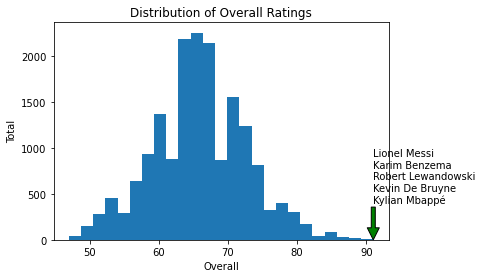

In [11]:
highest_overall = data["Overall"].max()
players_highest_overall = '\n'.join(data[data["Overall"] == highest_overall]["Full Name"].tolist())

plt.hist(data['Overall'], bins=25)
plt.xlabel('Overall')
plt.ylabel('Total')
plt.title('Distribution of Overall Ratings')
plt.annotate(players_highest_overall, xy = (highest_overall, 0), xytext = (highest_overall, 400), arrowprops = dict(facecolor ='green'))
plt.show()

In [12]:
data.sort_values("Potential", ascending = False)[["Full Name", "Potential"]].head(10)

,Full Name,Potential
4,Kylian Mbappé,95
21,Erling Haaland,94
82,Pedro González López,93
83,Phil Foden,92
63,Vinícius José de Oliveira Júnior,92
42,Frenkie de Jong,92
22,Gianluigi Donnarumma,92
0,Lionel Messi,91
16,Ederson Santana de Moraes,91
127,Jamie Tartt,91


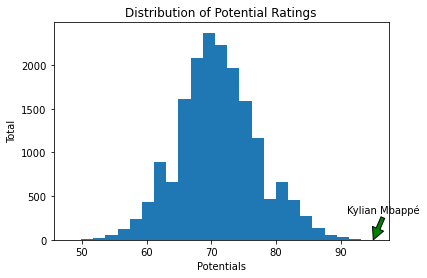

In [13]:
highest_potential = data["Potential"].max()
players_highest_potential = '\n'.join(data[data["Potential"] == highest_potential]["Full Name"].tolist())

plt.hist(data["Potential"], bins = 25)
plt.xlabel("Potentials")
plt.ylabel("Total")
plt.title('Distribution of Potential Ratings')
plt.annotate(players_highest_potential, xy = (highest_potential, 0), xytext = (highest_overall, 300), arrowprops=dict(facecolor = 'green'))

plt.show()

In [14]:
specified_order = ["GK", "RWB", "RB", "CB", "LB", "LWB", "CDM", "CM", "CAM", "RM", "LM", "RW", "LW", "CF", "ST"]
best_by_position = data.groupby("Best Position")[["Overall", "Potential"]].max().sort_index(key=lambda x: x.map({v: i for i, v in enumerate(specified_order)}))

best_overall_by_post = []
best_potential_by_post = []

for ind, row in best_by_position.iterrows():
    best_overall_by_post.append(", ".join(data[(data["Overall"] == row["Overall"]) & (data["Best Position"] == ind)]["Full Name"].tolist()))
    best_potential_by_post.append(", ".join(data[(data["Potential"] == row["Potential"]) & (data["Best Position"] == ind)]["Full Name"].tolist()))

best_by_position["Best Overall Players"] = best_overall_by_post
best_by_position["Best Potential Players"] = best_potential_by_post

best_by_position

,Overall,Potential,Best Overall Players,Best Potential Players
Best Position,,,,
GK,90,92,"Thibaut Courtois, Manuel Neuer",Gianluigi Donnarumma
RWB,84,88,Reece James,Reece James
RB,85,87,Kyle Walker,Achraf Hakimi
CB,90,91,Virgil van Dijk,Rúben Santos Gato Alves Dias
LB,88,88,João Pedro Cavaco Cancelo,"João Pedro Cavaco Cancelo, Nuno Alexandre Tava..."
LWB,85,90,Theo Hernández,Theo Hernández
CDM,89,90,"Carlos Henrique Venancio Casimiro, Joshua Kimm...","Joshua Kimmich, Sandro Tonali"
CM,91,93,Kevin De Bruyne,Pedro González López
CAM,91,92,Lionel Messi,Phil Foden


In [33]:
data.groupby("Club Name")[["Overall", "Potential"]].mean().round(2).sort_values(["Overall", "Potential"], ascending= [False, False]).head(10)



,Overall,Potential
Club Name,,
FC Bayern München,80.59,84.73
Paris Saint-Germain,79.81,84.23
Inter,79.73,82.65
Manchester City,79.31,84.42
Liverpool,78.67,83.60
Chelsea,78.34,84.14
AFC Richmond,78.11,80.05
Villarreal CF,78.08,81.08
RB Leipzig,77.71,81.92


In [34]:
data["delta_potential_overall"] = data["Potential"] - data["Overall"]
data[data["Potential"] >= 85][["Full Name", "Best Position", "Nationality", "Club Name", "Age", "Overall", "Potential","delta_potential_overall"]].sort_values(["delta_potential_overall", 'Potential'], ascending= [False, False]).head(10)

,Full Name,Best Position,Nationality,Club Name,Age,Overall,Potential,delta_potential_overall
11114,Carney Chukwuemeka,CAM,England,Chelsea,18,64,86,22
10334,Alejandro Garnacho Ferreyra,LW,Argentina,Manchester United,18,64,85,21
10488,Mika Godts,CAM,Belgium,KRC Genk,17,64,85,21
11010,Charlie Patino,CM,England,Blackpool,18,64,85,21
6645,Antonio Nusa,LW,Norway,Club Brugge KV,17,68,88,20
6997,Jamie Bynoe-Gittens,RM,England,Borussia Dortmund,17,67,87,20
8306,António João Tavares Silva,CB,Portugal,SL Benfica,18,66,86,20
8381,Kayky da Silva Chagas,LM,Brazil,FC Paços de Ferreira,19,66,86,20
9331,Marko Lazetić,ST,Serbia,AC Milan,18,65,85,20
9354,Dane Scarlett,ST,England,Portsmouth,18,65,85,20


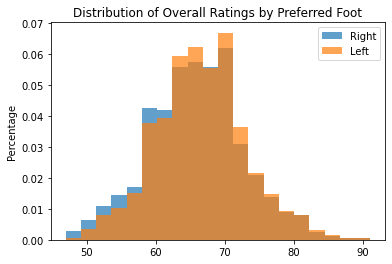

In [43]:
plt.hist(data[data["Preferred Foot"] == "Right"]["Overall"], bins = 20, density= True, alpha = 0.7)
plt.hist(data[data["Preferred Foot"] == "Left"]["Overall"], bins = 20, density= True, alpha = 0.7)

plt.ylabel("Percentage")
plt.legend(["Right", "Left"])
plt.title("Distribution of Overall Ratings by Preferred Foot")

plt.show()

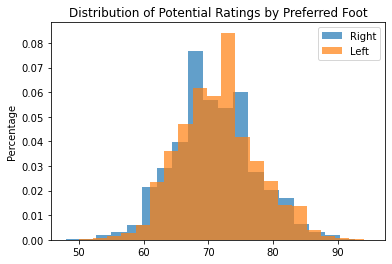

In [44]:
plt.hist(data[data["Preferred Foot"] == "Right"]["Potential"], bins = 20, density= True, alpha = 0.7)
plt.hist(data[data["Preferred Foot"] == "Left"]["Potential"], bins = 20, density= True, alpha = 0.7)

plt.ylabel("Percentage")
plt.title("Distribution of Potential Ratings by Preferred Foot")
plt.legend(["Right", "Left"])

plt.show()

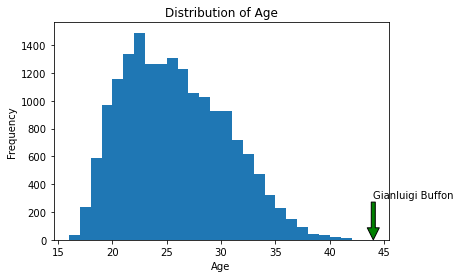

In [35]:
oldest = data["Age"].max()
youngest = data["Age"].min()
players_oldest = '\n'.join(data[data["Age"] == oldest]["Full Name"].tolist())

plt.hist(data["Age"], bins = oldest - youngest)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.annotate(players_oldest, xy = (oldest, 0), xytext = (oldest, 300), arrowprops=dict(facecolor = 'green'))

plt.show()


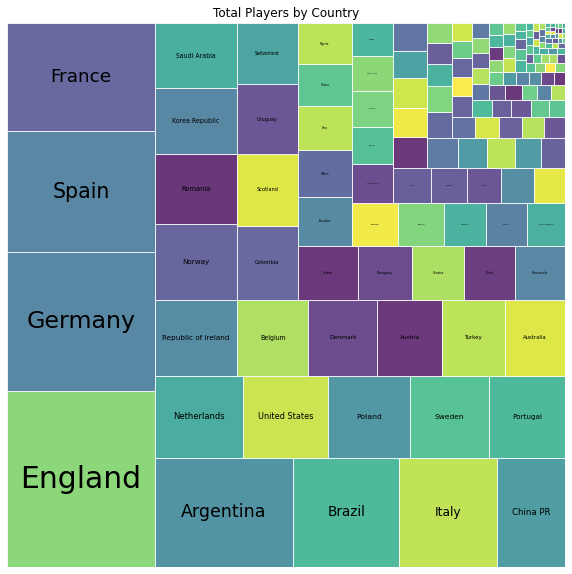

In [36]:
nationality_counts = data['Nationality'].value_counts()

top_countries = 50  
top_nationalities = nationality_counts.head(top_countries)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

sizes = nationality_counts.values
labels = ['' if nationality not in top_nationalities.index else nationality for nationality in nationality_counts.index]

treemap = squarify.plot(sizes=sizes, label=labels, ax=ax, alpha=0.8, edgecolor='white')

ax.set_title('Total Players by Country')

for text in treemap.texts:
    for i, nationality in enumerate(labels):
        if text.get_text() == nationality:
            text.set_fontsize(sizes[i] * 0.02)  

plt.axis('off')

plt.show()


                         Full Name  Wage(in Euro)
1                    Karim Benzema       450000.0
2               Robert Lewandowski       420000.0
3                  Kevin De Bruyne       350000.0
28                      Toni Kroos       310000.0
5                    Mohamed Salah       270000.0
23  Bernardo Mota Carvalho e Silva       260000.0
6                 Thibaut Courtois       250000.0
24       João Pedro Cavaco Cancelo       250000.0
30                 Antonio Rüdiger       250000.0
10                      Harry Kane       240000.0


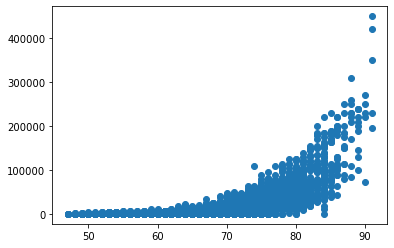

In [37]:
print(data[["Full Name", "Wage(in Euro)"]].sort_values("Wage(in Euro)", ascending= False).head(10))
plt.scatter(data["Overall"], data["Wage(in Euro)"])

In [38]:
correlation = data["Overall"].corr(data["Wage(in Euro)"])
print("Correlation between Overall and Wage: ", correlation)

Correlation between Overall and Wage:  0.6039835661557151


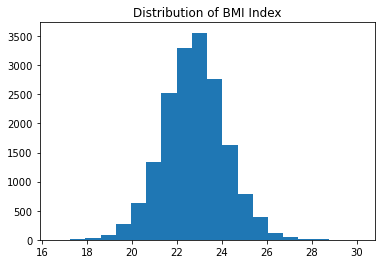

In [39]:
data["bmi"] = data["Weight(in kg)"] / (data['Height(in cm)']/100)**2

plt.hist(data["bmi"], bins = 20)
plt.title("Distribution of BMI Index")

plt.show()

In [40]:
X = data[["Age", "Height(in cm)", "Weight(in kg)", "Preferred Foot", "Skill Moves"]]
X = pd.get_dummies(X, columns=["Preferred Foot"]) 
y = data["Overall"]

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     1842.
Date:                Thu, 25 May 2023   Prob (F-statistic):               0.00
Time:                        22:27:13   Log-Likelihood:                -54763.
No. Observations:               17529   AIC:                         1.095e+05
Df Residuals:                   17523   BIC:                         1.096e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.5987 